In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
dataset_train = pd.read_excel("data.xlsx")
x = dataset_train.iloc[:,1:2].values

In [3]:
from sklearn.model_selection import train_test_split
train_size = 0.8
split_index = int(len(x) * train_size)
train_data = x[:split_index]
test_data = x[split_index:]

In [4]:
train_data

array([[7.28499217e-08],
       [7.28499217e-08],
       [3.87289019e-08],
       ...,
       [5.70174037e-04],
       [5.91724850e-04],
       [5.91570358e-04]])

In [5]:
test_data

array([[0.00059617],
       [0.00062021],
       [0.00064069],
       [0.00064898],
       [0.00064172],
       [0.00064503],
       [0.00061945],
       [0.00062257],
       [0.00059298],
       [0.00060119],
       [0.00062107],
       [0.00062597],
       [0.00062751],
       [0.00063488],
       [0.00063058],
       [0.00061485],
       [0.00059489],
       [0.00060378],
       [0.00063279],
       [0.00063861],
       [0.00062271],
       [0.00062042],
       [0.0006163 ],
       [0.00065454],
       [0.00065508],
       [0.00066484],
       [0.00064618],
       [0.00064431],
       [0.00063218],
       [0.00063567],
       [0.00063135],
       [0.00064266],
       [0.00063532],
       [0.00064405],
       [0.00062695],
       [0.00064885],
       [0.00064395],
       [0.00064229],
       [0.00067528],
       [0.00070231],
       [0.00068158],
       [0.0006971 ],
       [0.00069166],
       [0.00067372],
       [0.00068558],
       [0.00071739],
       [0.00082738],
       [0.000

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [7]:
# Creatung a data structue with 100 timesteps and 1 output

x_train = []
y_train = []
for i in range(100,len(train_data)):
    x_train.append(train_data_scaled[i-100:i,0])
    y_train.append(train_data_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Reshapping
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [9]:
# Building the RNN

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

rnn = Sequential()

rnn.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1))) # 1st LSTM Layers 
rnn.add(Dropout(0.2)) # 1st Dropout Layers

rnn.add(LSTM(units=50,return_sequences=True)) # 2nd LSTM Layers 
rnn.add(Dropout(0.2)) # 2nd Dropout Layers

rnn.add(LSTM(units=50,return_sequences=True)) # 3rd LSTM Layers 
rnn.add(Dropout(0.2)) # 3rd Dropout Layers

rnn.add(LSTM(units=50)) # 4th LSTM Layers 
rnn.add(Dropout(0.2)) # 4th Dropout Layers

# Output Layer
rnn.add(Dense(units=1))

In [10]:
# Compiling the RNN
rnn.compile(optimizer="adam", loss="mean_squared_error")

In [11]:
# Training the RNN Model
rnn.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
30/30 [==============================] - 12s 147ms/step - loss: 0.0118
Epoch 2/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0052
Epoch 3/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0048
Epoch 4/100
30/30 [==============================] - 5s 155ms/step - loss: 0.0039
Epoch 5/100
30/30 [==============================] - 5s 151ms/step - loss: 0.0035
Epoch 6/100
30/30 [==============================] - 25s 874ms/step - loss: 0.0038
Epoch 7/100
30/30 [==============================] - 14s 450ms/step - loss: 0.0035
Epoch 8/100
30/30 [==============================] - 6s 205ms/step - loss: 0.0033
Epoch 9/100
30/30 [==============================] - 6s 198ms/step - loss: 0.0035
Epoch 10/100
30/30 [==============================] - 5s 178ms/step - loss: 0.0032
Epoch 11/100
30/30 [==============================] - 5s 172ms/step - loss: 0.0030
Epoch 12/100
30/30 [==============================] - 5s 171ms/step - loss: 0.0035
Epoch 13/1

In [60]:
# Making the Predictions and Visualisation

inputs = x[len(train_data)-100:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(100,len(test_data)+100):
    x_test.append(inputs[i-100:i,0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

y_pred = rnn.predict(x_test)
y_pred = sc.inverse_transform(y_pred)
y_pred

9/9 [==============================] - 2s 58ms/step


array([[0.00054848],
       [0.00055336],
       [0.00056419],
       [0.0005816 ],
       [0.00059613],
       [0.00059784],
       [0.00059424],
       [0.00057745],
       [0.00056357],
       [0.00054316],
       [0.00053265],
       [0.00054141],
       [0.0005568 ],
       [0.00056877],
       [0.00057845],
       [0.00058194],
       [0.00057441],
       [0.00055682],
       [0.00054796],
       [0.0005614 ],
       [0.00058058],
       [0.00058494],
       [0.00058039],
       [0.00057326],
       [0.00058688],
       [0.00060305],
       [0.00061617],
       [0.00061299],
       [0.00060353],
       [0.00059036],
       [0.00058292],
       [0.00057896],
       [0.0005832 ],
       [0.00058543],
       [0.00058984],
       [0.00058541],
       [0.00058993],
       [0.00059443],
       [0.00059551],
       [0.00061084],
       [0.00063852],
       [0.00064758],
       [0.00065179],
       [0.00065035],
       [0.0006381 ],
       [0.00063243],
       [0.00064772],
       [0.000

In [61]:
y_true = test_data
y_true

array([[0.00059617],
       [0.00062021],
       [0.00064069],
       [0.00064898],
       [0.00064172],
       [0.00064503],
       [0.00061945],
       [0.00062257],
       [0.00059298],
       [0.00060119],
       [0.00062107],
       [0.00062597],
       [0.00062751],
       [0.00063488],
       [0.00063058],
       [0.00061485],
       [0.00059489],
       [0.00060378],
       [0.00063279],
       [0.00063861],
       [0.00062271],
       [0.00062042],
       [0.0006163 ],
       [0.00065454],
       [0.00065508],
       [0.00066484],
       [0.00064618],
       [0.00064431],
       [0.00063218],
       [0.00063567],
       [0.00063135],
       [0.00064266],
       [0.00063532],
       [0.00064405],
       [0.00062695],
       [0.00064885],
       [0.00064395],
       [0.00064229],
       [0.00067528],
       [0.00070231],
       [0.00068158],
       [0.0006971 ],
       [0.00069166],
       [0.00067372],
       [0.00068558],
       [0.00071739],
       [0.00082738],
       [0.000

In [62]:
date = dataset_train["Timestamp"]
x_axis = date.iloc[len(train_data):]

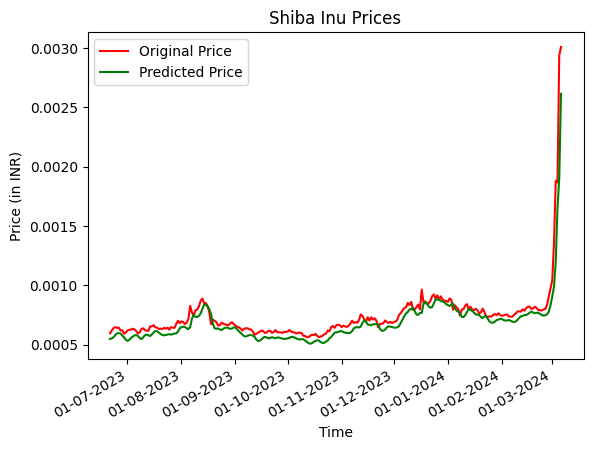

In [220]:
from matplotlib.dates import DateFormatter

# Set the date format for the x-axis
date_format = DateFormatter("%d-%m-%Y")  # Adjust the format as needed
plt.gca().xaxis.set_major_formatter(date_format)

# Rotate the dates to prevent overlapping
plt.gcf().autofmt_xdate()

plt.plot(x_axis, y_true, color="red", label="Original Price")
plt.plot(x_axis, y_pred, color="green", label="Predicted Price")

plt.xlabel("Time")
plt.ylabel("Price (in INR)")
plt.title("Shiba Inu Prices")
plt.legend()
plt.show()

In [179]:
# Code Snippet for logic
# x_new_test = x[len(x)-100:len(x),0]
# # x_new_test.shape
# x_new_test = sc.transform(x_new_test.reshape(-1,1))
# x_new_test = x_new_test.reshape(1,100)
# # Reshaping
# x_new_test = np.reshape(x_new_test, (x_new_test.shape[0],x_new_test.shape[1],1))

# y_new_pred = rnn.predict(x_new_test)
# y_new_pred = sc.inverse_transform(y_new_pred)
# y_new_pred

1/1 [==============================] - 0s 27ms/step


array([[0.00302748]], dtype=float32)

In [245]:
x_bin = x

for i in range(0,60):
    x_new_test = x_bin[len(x)-100+i:len(x)+i]
    x_new_test = sc.transform(x_new_test.reshape(-1,1))
    x_new_test = x_new_test.reshape(1,100)
    # Reshaping
    x_new_test = np.reshape(x_new_test, (x_new_test.shape[0],x_new_test.shape[1],1))
    y_new_pred = rnn.predict(x_new_test)
    y_new_pred = sc.inverse_transform(y_new_pred)
    
    x_bin = np.append(x_bin, y_new_pred)

1/1 [==============================] - 0s 50ms/step


In [246]:
x_bin[len(x):].shape

(60,)

In [247]:
new_data = x_bin[len(x):]
new_data

array([0.00302748, 0.00310662, 0.00312084, 0.0031174 , 0.00310789,
       0.0030989 , 0.00309491, 0.00309883, 0.00311243, 0.00313655,
       0.00317107, 0.00321504, 0.00326677, 0.00332397, 0.00338401,
       0.00344416, 0.00350186, 0.00355491, 0.00360164, 0.00364098,
       0.00367244, 0.00369606, 0.00371231, 0.00372195, 0.00372593,
       0.0037253 , 0.00372108, 0.00371424, 0.00370565, 0.00369604,
       0.003686  , 0.00367597, 0.00366626, 0.00365707, 0.00364848,
       0.00364049, 0.00363307, 0.0036261 , 0.0036195 , 0.00361314,
       0.00360691, 0.00360074, 0.00359456, 0.00358833, 0.00358203,
       0.00357568, 0.0035693 , 0.00356293, 0.00355662, 0.00355044,
       0.00354442, 0.00353862, 0.00353309, 0.00352786, 0.00352296,
       0.0035184 , 0.00351419, 0.00351032, 0.00350679, 0.00350358])

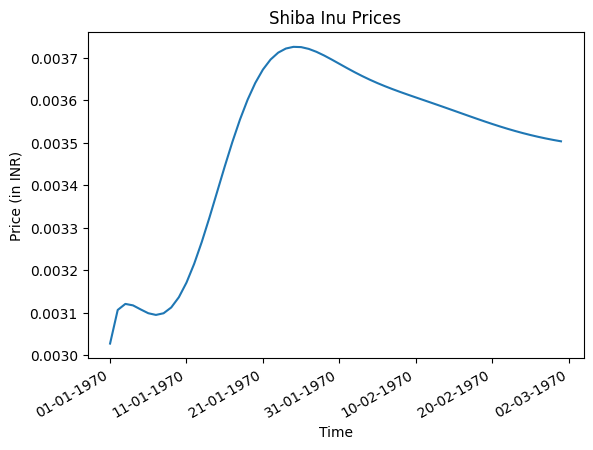

In [264]:
from matplotlib.dates import DateFormatter

# Set the date format for the x-axis
date_format = DateFormatter("%d-%m-%Y")  # Adjust the format as needed
plt.gca().xaxis.set_major_formatter(date_format)

# Rotate the dates to prevent overlapping
plt.gcf().autofmt_xdate()

plt.plot(new_data)

plt.xlabel("Time")
plt.ylabel("Price (in INR)")
plt.title("Shiba Inu Prices")
plt.show()

In [249]:
y_pred.shape

(260, 1)

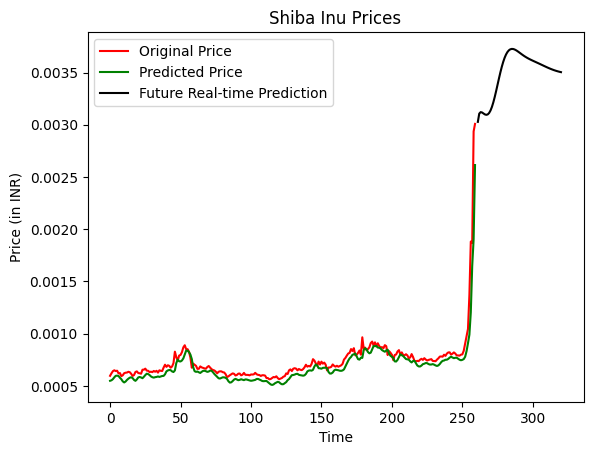

In [262]:
from matplotlib.dates import DateFormatter



x_bin_axis = x_axis

plt.plot(y_true, color="red", label="Original Price")
plt.plot(y_pred, color="green", label="Predicted Price")

new_x_axis_ultimate = []
for i in range(1,61):   
    new_x_axis_ultimate = np.append(new_x_axis_ultimate,len(y_true)+i)
    
plt.plot(new_x_axis_ultimate,new_data,color="black", label="Future Real-time Prediction")

plt.xlabel("Time")
plt.ylabel("Price (in INR)")
plt.title("Shiba Inu Prices")
plt.legend()
plt.show()